## Determinants of Readmissons

The need to reduce hospital readmissions of patients has been justified on two important grounds; first, the unplanned costs of readmission was put at between 15 to 20 billion dollars annually which is not healthy for the well-being of the healthcare system.  Secondly, reducing readmissions is seeing as a strategy of improving the quality of life of patients [Eric Alper et.al](https://www.uptodate.com/contents/hospital-discharge-and-readmission).

This project seeks to understand some of the underlying causes of hospital readmission among diabetics patients.  The dataset is sourced from Kaggle [website](https://www.kaggle.com/datasets/saurabhtayal/diabetic-patients-readmission-prediction).

### Import the necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv("diabetics.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Perform Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Identitying Necessary Features for modelling

From literature search some of the factors that causes readmissions include:
* Early discharge
* Demographic factors
* Discharge disposition
* Severity of health condition
* Self-discharge

In view of the above factors, the features that are connected with the factors will be carefully selected forthis analysis

In [6]:
# Check for duplicate rows

df.shape

(101766, 50)

In [7]:
duplicateRows = df[df.duplicated()]

In [8]:
duplicateRows

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [9]:
# explore the race feature--a demographic feature cogent for prediction

df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Given that race which is a socio-demographic status that has been identified as one of the most important factors determinig readmissions, we shall delete all rows with no identification of race.

In [10]:
# Remove rows with '?'

df = df[df['race']!='?']

In [11]:
df.shape

(99493, 50)

In [12]:
# Explore age

df['age'].value_counts()

[70-80)     25469
[60-70)     21988
[50-60)     16895
[80-90)     16800
[40-50)      9465
[30-40)      3699
[90-100)     2724
[20-30)      1611
[10-20)       682
[0-10)        160
Name: age, dtype: int64

In [13]:
df['age'].groupby(df.readmitted).count()

readmitted
<30    11169
>30    35007
NO     53317
Name: age, dtype: int64

This analysis is based on readmission within 30 days, hence, all readmissions beyond 30 days shall be excluded.

In [14]:
# Adjust for readmitted variable to remove >30 days

df = df[df['readmitted']!='>30']

In [15]:
df.shape

(64486, 50)

In [16]:
df['weight'].value_counts()

?            62876
[75-100)       637
[50-75)        488
[100-125)      321
[125-150)       69
[25-50)         53
[150-175)       19
[0-25)          17
[175-200)        6
Name: weight, dtype: int64

We'll delete the weight column because the number of unknown weight is overwelming

In [17]:
# Admission type will be crucial to our analysis

df['admission_type_id'].value_counts()

1    33897
3    12842
2    11441
6     3025
5     3019
8      234
7       20
4        8
Name: admission_type_id, dtype: int64

In [18]:
# Recode admission type_id to reflect its true meaning

def admission_type(x):
    if x == 1:
        return "Emergency"
    elif x == 2:
        return "Urgent"
    elif x == 3:
        return "Election"
    elif x == 5:
        return "Trauma"
    else:
        return "Others"

In [19]:
df['admissions'] = df['admission_type_id'].apply(admission_type)

In [20]:
df['admissions'].value_counts()

Emergency    33897
Election     12842
Urgent       11441
Others        3287
Trauma        3019
Name: admissions, dtype: int64

In [21]:
# Discharge disposition ID is also a crucial variable

df['discharge_disposition_id'].value_counts()

1     37582
3      8796
6      7403
18     2646
11     1608
22     1467
2      1402
5       804
25      603
4       495
7       392
14      362
13      361
23      263
28      104
8        69
15       45
24       32
9        19
17        9
19        8
16        5
27        4
12        3
10        2
20        2
Name: discharge_disposition_id, dtype: int64

In [22]:
# Recode the variable to reflect the true meanings

def discharge(x):
    if x == 1:
        return "Routine_Discharge"
    elif x == 2:
        return "GH_In_patientcare"
    elif x == 3:
        return "Skilled_Nursing_Faciltiy"
    elif x == 4:
        return "Intermediate_care_facility"
    elif x == 5:
        return "Designated_cancer_center"
    elif x == 6:
        return "Home_care_health"
    elif x == 7:
        return "Against_Medical_Advice"
    else:
        return "Reserved_For_national_Assignment"

In [23]:
df['discharge'] = df['discharge_disposition_id'].apply(discharge)

In [24]:
df['discharge'].value_counts()

Routine_Discharge                   37582
Skilled_Nursing_Faciltiy             8796
Reserved_For_national_Assignment     7612
Home_care_health                     7403
GH_In_patientcare                    1402
Designated_cancer_center              804
Intermediate_care_facility            495
Against_Medical_Advice                392
Name: discharge, dtype: int64

In [25]:
# Check the source of admission

df['admission_source_id'].value_counts()

7     35238
1     19363
17     4270
4      2338
6      1630
2       744
5       614
3       129
20       79
9        48
8        12
22        9
10        5
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [26]:
# Recode to get real meaning

def admission_source(x):
    if x == 1:
        return "Physcian Referral"
    elif x == 2:
        return "Clinic Referral"
    elif x == 7:
        return "Emergency_Room"
    elif x == 4:
        return "Transfer_Hospital"
    elif x == 5:
        return "Transfer_SNF"
    elif x == 6:
        return "Transfer_Another_Hospital"
    elif x == 17:
        return "Undefined"
    else:
        return "Others"

In [27]:
df['adm_source'] = df['admission_source_id'].apply(admission_source)

In [28]:
df['adm_source'].value_counts()

Emergency_Room               35238
Physcian Referral            19363
Undefined                     4270
Transfer_Hospital             2338
Transfer_Another_Hospital     1630
Clinic Referral                744
Transfer_SNF                   614
Others                         289
Name: adm_source, dtype: int64

Transfer source gives an indication of the severity of the illness which can help in understanding whether a patient was discharged prematurely from the facility.  We can as well remove the 'Undefined' source since this variable is an important one for this analysis.

In [29]:
df = df[df['adm_source']!='Undefined']

In [30]:
df.shape

(60216, 53)

#### Time the hospital

This is an important feature according to the literature.  Patients that are discharged prematurely ended up being readmitted withing a short period of time.  Given that the maximumn number of days in the hospital is 14 days, we shall create categories to reflect the length of stay in the hospital

In [31]:
df['time_in_hospital'].value_counts().sort_index()

1      8778
2     10250
3     10540
4      8040
5      5836
6      4356
7      3429
8      2585
9      1752
10     1386
11     1059
12      860
13      724
14      621
Name: time_in_hospital, dtype: int64

In [32]:
def duration(x):
    if x == 1:
        return '1 day'
    elif x in [2,3,5]:
        return '2-5 days'
    elif x in [6,7,8]:
        return '6-8 days'
    elif x in [9,10]:
        return '9-10 days'
    else:
        return '>10 days'

In [33]:
df['hospital_duration'] = df['time_in_hospital'].apply(duration)

In [34]:
df['hospital_duration'].value_counts()

2-5 days     26626
>10 days     11304
6-8 days     10370
1 day         8778
9-10 days     3138
Name: hospital_duration, dtype: int64

### Medical Speciality

We did not see some arguements pointing to the role of medical speciality in readmissions.  However, we would like to see if this plays a crucial role in this project.

In [35]:
df['medical_specialty'].value_counts()

?                                       29192
InternalMedicine                         9319
Emergency/Trauma                         4539
Family/GeneralPractice                   3732
Cardiology                               2924
Surgery-General                          1749
Orthopedics                              1051
Nephrology                                844
Radiologist                               740
Orthopedics-Reconstructive                635
ObstetricsandGynecology                   512
Surgery-Cardiovascular/Thoracic           502
Psychiatry                                497
Pulmonology                               492
Urology                                   439
Surgery-Neuro                             381
Surgery-Vascular                          333
Gastroenterology                          322
PhysicalMedicineandRehabilitation         282
Oncology                                  247
Pediatrics                                169
Neurology                         

In [116]:
# Based on the distribution of the dataset, we shall select rows in which we have lots of patients and medical specialty is provided

speciality = ['Emergency', 'Family/GeneralPractice','Cardiology','Surgery-General','Nephrology'] 
df = df[df['medical_specialty'].isin(speciality)] 

In [37]:
df.shape

(9249, 54)

In [38]:
# Payer_code:  even though we do not see a clear logical association between payer code and readmission, 
#I have a suspicion that monetary issues may play a role

df['payer_code'].value_counts()

?     4073
MC    2606
BC     575
SP     525
UN     413
MD     322
HM     290
CP     173
CM     140
OG      60
DM      37
PO      11
WC      10
CH       8
MP       4
OT       2
Name: payer_code, dtype: int64

In [39]:
# We shall select the rows with known major payers

payers =['MC','BC','SP','UN','MD','HM','CP','CM']
df = df[df['payer_code'].isin(payers)] 

In [40]:
df.shape

(5044, 54)

In [41]:
# Number of procedures

df['num_procedures'].value_counts()

0    1751
1    1091
2     701
3     562
6     403
4     269
5     267
Name: num_procedures, dtype: int64

In [42]:
def proced(x):
    if x == 0:
        return 'None'
    elif x == 1:
        return '1 procd'
    elif x == 2:
        return '2 procd'
    elif x ==3:
        return '3 procd'
    elif x in [4,5]:
        return '4-5 procd'
    else:
        return '>5 times'

In [43]:
df['procedures'] = df['num_procedures'].apply(proced)

In [44]:
df['procedures'].value_counts()

None         1751
1 procd      1091
2 procd       701
3 procd       562
4-5 procd     536
>5 times      403
Name: procedures, dtype: int64

In [45]:
# Number of medications

df['num_medications'].value_counts().sort_index()


1       8
2      30
3      56
4      84
5     110
6     124
7     175
8     236
9     222
10    263
11    279
12    263
13    257
14    284
15    279
16    266
17    240
18    243
19    193
20    180
21    156
22    141
23    135
24     96
25    106
26     70
27     87
28     60
29     35
30     52
31     36
32     36
33     25
34     21
35     19
36     18
37     17
38     14
39     15
40     16
41      8
42      9
43      9
44      4
45      6
46      4
47      2
48      5
49      6
50      5
51      3
52      5
53      4
54      3
55      4
56      3
57      3
59      2
60      2
61      2
62      2
64      2
65      1
68      1
72      1
75      1
Name: num_medications, dtype: int64

In [46]:
def medic(x):
    if x in [1,2,3,4]:
        return '1-4 med'
    elif x in [5,6,7,8,9,10]:
        return '5-10 med'
    elif x in [11,12,13,14,15]:
        return '11-15 med'
    elif x in [16,17,18,19,20]:
        return '16 - 20 med'
    elif x in [21,22,23,24,25]:
        return '21-25 med'
    elif x in [26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]:
        return '26 - 40 med'
    else:
        return '>40 med'

In [47]:
df['medications'] = df['num_medications'].apply(medic)

In [48]:
df['medications'].value_counts()

11-15 med      1362
5-10 med       1130
16 - 20 med    1122
21-25 med       634
26 - 40 med     521
1-4 med         178
>40 med          97
Name: medications, dtype: int64

In [49]:
# number_outpatient 
# Number of outpatient visits of the patient in the year preceding the encounter

df['number_outpatient'].value_counts()

0     4376
1      404
2      121
3       69
4       43
5       14
6        5
8        4
9        4
13       2
10       2
Name: number_outpatient, dtype: int64

In [50]:
def outp(x):
    if x == 0:
        return 'None'
    elif x == 1:
        return '1 Time'
    elif x == 2:
        return '2 Times'
    elif x in [3,4,5]:
        return '3 - 5 times'
    else:
        return '>5 times'

In [51]:
df['outpatient_visit'] = df['number_outpatient'].apply(outp)

In [52]:
df['outpatient_visit'].value_counts()

None           4376
1 Time          404
3 - 5 times     126
2 Times         121
>5 times         17
Name: outpatient_visit, dtype: int64

In [53]:
# number of emergency visits prior to admission

df['number_emergency'].value_counts().sort_index()

0     4473
1      390
2       87
3       31
4       26
5       12
6        5
7        5
8        3
9        1
10       3
13       1
15       1
16       1
18       1
19       1
20       1
21       1
64       1
Name: number_emergency, dtype: int64

In [54]:
def emergency(x):
    if x == 0:
        return 'None'
    elif x == 1:
        return '1 Time'
    elif x == 2:
        return '2 Times'
    elif x in [3,4,5]:
        return '3 - 5 times'
    else:
        return '>5 times'
    
    

In [55]:
df['emergency_visit'] = df['number_emergency'].apply(emergency)

In [56]:
df['emergency_visit'].value_counts()

None           4473
1 Time          390
2 Times          87
3 - 5 times      69
>5 times         25
Name: emergency_visit, dtype: int64

In [57]:
# inpatient visits

df['number_inpatient'].value_counts().sort_index()

0     3480
1      942
2      305
3      138
4       66
5       45
6       22
7       14
8       14
9        7
10       3
11       3
12       3
13       1
15       1
Name: number_inpatient, dtype: int64

In [58]:
def inpatient(x):
    if x == 0:
        return 'None'
    elif x == 1:
        return '1 Time'
    elif x == 2:
        return '2 Times'
    elif x in [3,4,5,6]:
        return '3 - 6 times'
    else:
        return '>6 times'

In [59]:
df['inpatient_visit'] = df['number_inpatient'].apply(inpatient)

In [60]:
df['inpatient_visit'].value_counts()

None           3480
1 Time          942
2 Times         305
3 - 6 times     271
>6 times         46
Name: inpatient_visit, dtype: int64

In [61]:
# Check the target variable

df['readmitted'].value_counts()

NO     4208
<30     836
Name: readmitted, dtype: int64

In [62]:
# Recode readmitted to Yes and No

df['readmitted'] = df['readmitted'].replace({'NO':'No','<30':'Yes'})

In [63]:
df['readmitted'].value_counts()

No     4208
Yes     836
Name: readmitted, dtype: int64

### Selection of variables

Based on our initial exploration, the following variables will be selected for analysis:

* race
* age
* admissions
* adm_source
* duration
* medical_speciality
* payer_code
* procedures
* medications
* outpatients
* inpatient
* emergency
* readmitted

In [64]:
features = ['race','age','admissions','adm_source','discharge','hospital_duration','medical_specialty','payer_code','procedures',
            'medications','outpatient_visit','inpatient_visit','emergency_visit','readmitted']

data = df[features]

In [65]:
data.head()

,race,age,admissions,adm_source,discharge,hospital_duration,medical_specialty,payer_code,procedures,medications,outpatient_visit,inpatient_visit,emergency_visit,readmitted
20737,Caucasian,[60-70),Urgent,Physcian Referral,Routine_Discharge,2-5 days,Nephrology,MC,3 procd,11-15 med,None,None,None,No
24069,Caucasian,[30-40),Emergency,Transfer_Another_Hospital,Routine_Discharge,>10 days,Nephrology,MC,2 procd,16 - 20 med,None,None,None,No
24117,Caucasian,[30-40),Urgent,Transfer_Hospital,Routine_Discharge,>10 days,Nephrology,MC,4-5 procd,16 - 20 med,None,None,None,No
24198,AfricanAmerican,[20-30),Emergency,Transfer_Another_Hospital,Routine_Discharge,1 day,Family/GeneralPractice,UN,None,5-10 med,None,None,None,No
24309,Caucasian,[50-60),Emergency,Transfer_Another_Hospital,Routine_Discharge,2-5 days,Surgery-General,UN,None,11-15 med,None,None,None,No


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5044 entries, 20737 to 101764
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   race               5044 non-null   object
 1   age                5044 non-null   object
 2   admissions         5044 non-null   object
 3   adm_source         5044 non-null   object
 4   discharge          5044 non-null   object
 5   hospital_duration  5044 non-null   object
 6   medical_specialty  5044 non-null   object
 7   payer_code         5044 non-null   object
 8   procedures         5044 non-null   object
 9   medications        5044 non-null   object
 10  outpatient_visit   5044 non-null   object
 11  inpatient_visit    5044 non-null   object
 12  emergency_visit    5044 non-null   object
 13  readmitted         5044 non-null   object
dtypes: object(14)
memory usage: 591.1+ KB


In [67]:
# convert data to categorical features

list_str_obj_cols = data.columns[data.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    data[str_obj_col] = data[str_obj_col].astype("category")

data.dtypes

race                 category
age                  category
admissions           category
adm_source           category
discharge            category
hospital_duration    category
medical_specialty    category
payer_code           category
procedures           category
medications          category
outpatient_visit     category
inpatient_visit      category
emergency_visit      category
readmitted           category
dtype: object

In [68]:
data.head()

,race,age,admissions,adm_source,discharge,hospital_duration,medical_specialty,payer_code,procedures,medications,outpatient_visit,inpatient_visit,emergency_visit,readmitted
20737,Caucasian,[60-70),Urgent,Physcian Referral,Routine_Discharge,2-5 days,Nephrology,MC,3 procd,11-15 med,None,None,None,No
24069,Caucasian,[30-40),Emergency,Transfer_Another_Hospital,Routine_Discharge,>10 days,Nephrology,MC,2 procd,16 - 20 med,None,None,None,No
24117,Caucasian,[30-40),Urgent,Transfer_Hospital,Routine_Discharge,>10 days,Nephrology,MC,4-5 procd,16 - 20 med,None,None,None,No
24198,AfricanAmerican,[20-30),Emergency,Transfer_Another_Hospital,Routine_Discharge,1 day,Family/GeneralPractice,UN,None,5-10 med,None,None,None,No
24309,Caucasian,[50-60),Emergency,Transfer_Another_Hospital,Routine_Discharge,2-5 days,Surgery-General,UN,None,11-15 med,None,None,None,No


### Univariate and Bivariate Analysis

In [69]:
race = pd.crosstab(data['race'],data['readmitted'],margins=True)
race

readmitted,No,Yes,All
race,,,
AfricanAmerican,960,193,1153
Asian,35,5,40
Caucasian,3090,618,3708
Hispanic,73,7,80
Other,50,13,63
All,4208,836,5044


In [70]:
pd.crosstab(data.race, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
race,,
AfricanAmerican,0.832611,0.167389
Asian,0.875000,0.125000
Caucasian,0.833333,0.166667
Hispanic,0.912500,0.087500
Other,0.793651,0.206349
Total,0.834259,0.165741


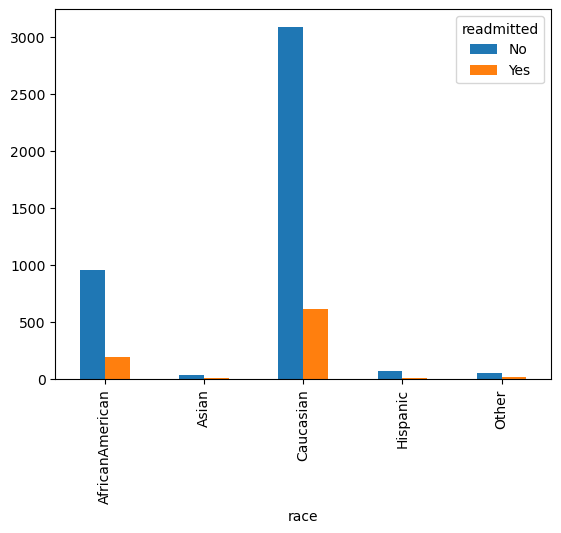

In [71]:
pd.crosstab(data['race'],data['readmitted']).plot(kind="bar",stacked=False);

In [72]:
pd.crosstab(data.age, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
age,,
[10-20),0.875000,0.125000
[20-30),0.850746,0.149254
[30-40),0.855615,0.144385
[40-50),0.867117,0.132883
[50-60),0.852654,0.147346
[60-70),0.839404,0.160596
[70-80),0.822853,0.177147
[80-90),0.803342,0.196658
[90-100),0.800000,0.200000


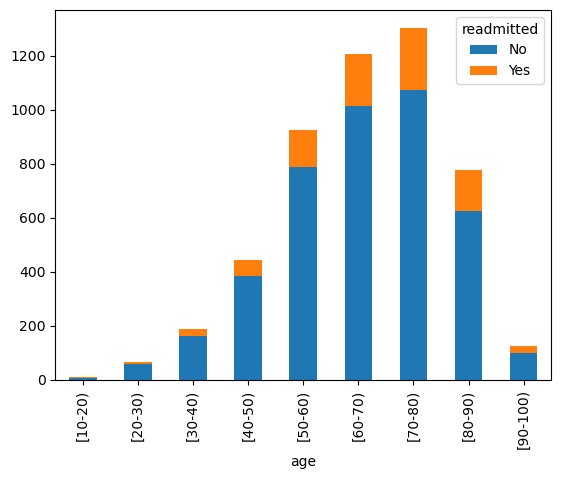

In [73]:
pd.crosstab(data['age'],data['readmitted']).plot(kind="bar",stacked=True);

In [74]:
pd.crosstab(data.admissions, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
admissions,,
Election,0.827818,0.172182
Emergency,0.829658,0.170342
Trauma,1.000000,0.000000
Urgent,0.850193,0.149807
Total,0.834259,0.165741


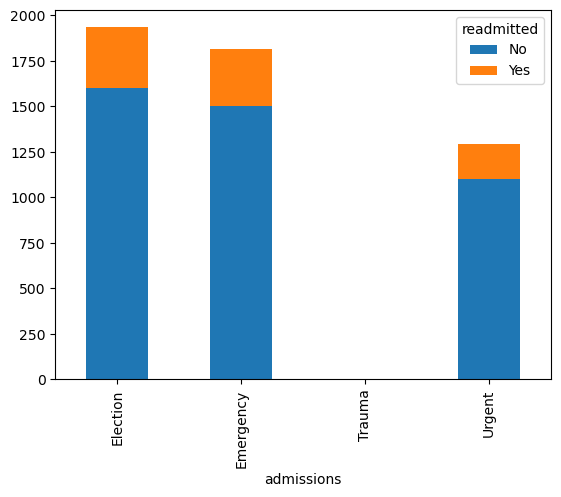

In [75]:
pd.crosstab(data['admissions'],data['readmitted']).plot(kind="bar",stacked=True);

In [76]:
pd.crosstab(data.adm_source, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
adm_source,,
Clinic Referral,0.833333,0.166667
Emergency_Room,0.802658,0.197342
Others,0.846154,0.153846
Physcian Referral,0.844500,0.155500
Transfer_Another_Hospital,0.904639,0.095361
Transfer_Hospital,0.887255,0.112745
Transfer_SNF,0.813559,0.186441
Total,0.834259,0.165741


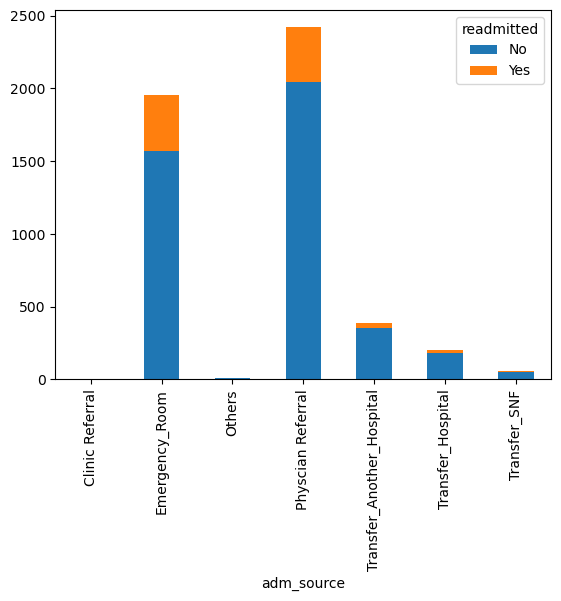

In [77]:
pd.crosstab(data['adm_source'],data['readmitted']).plot(kind="bar",stacked=True);

In [78]:
pd.crosstab(data.discharge, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
discharge,,
Against_Medical_Advice,0.740741,0.259259
Designated_cancer_center,0.892857,0.107143
GH_In_patientcare,0.831858,0.168142
Home_care_health,0.797101,0.202899
Intermediate_care_facility,0.848485,0.151515
Reserved_For_national_Assignment,0.811728,0.188272
Routine_Discharge,0.858639,0.141361
Skilled_Nursing_Faciltiy,0.737458,0.262542
Total,0.834259,0.165741


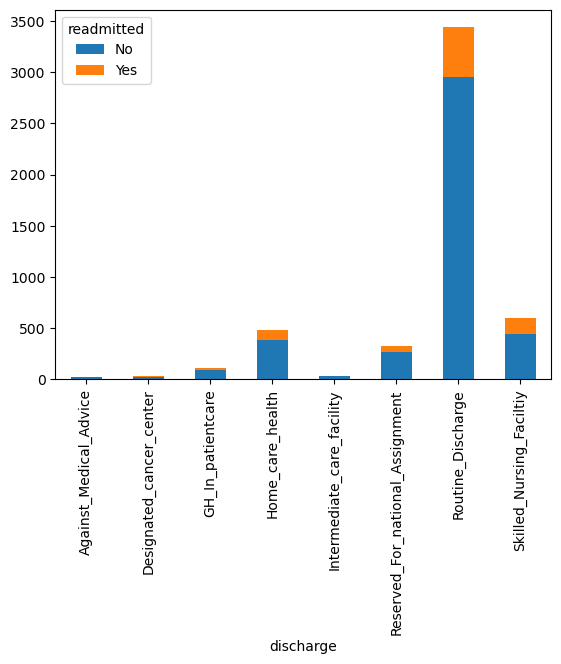

In [79]:
pd.crosstab(data['discharge'],data['readmitted']).plot(kind="bar",stacked=True);

In [80]:
pd.crosstab(data.hospital_duration, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
hospital_duration,,
1 day,0.885458,0.114542
2-5 days,0.831584,0.168416
6-8 days,0.806888,0.193112
9-10 days,0.787402,0.212598
>10 days,0.820981,0.179019
Total,0.834259,0.165741


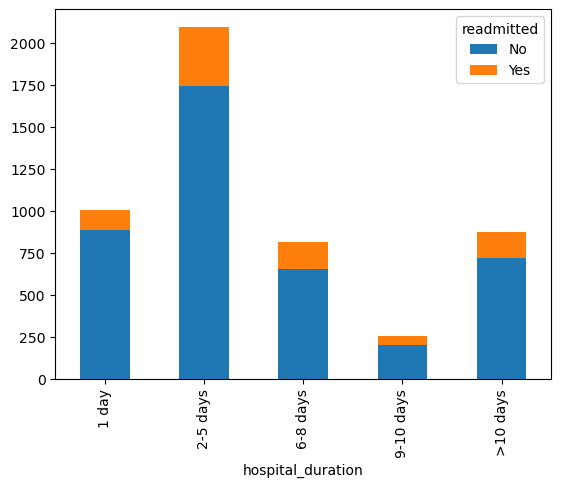

In [81]:
pd.crosstab(data['hospital_duration'],data['readmitted']).plot(kind="bar",stacked=True);

In [82]:
pd.crosstab(data.medical_specialty, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
medical_specialty,,
Cardiology,0.869390,0.130610
Family/GeneralPractice,0.833871,0.166129
Nephrology,0.743316,0.256684
Surgery-General,0.833628,0.166372
Total,0.834259,0.165741


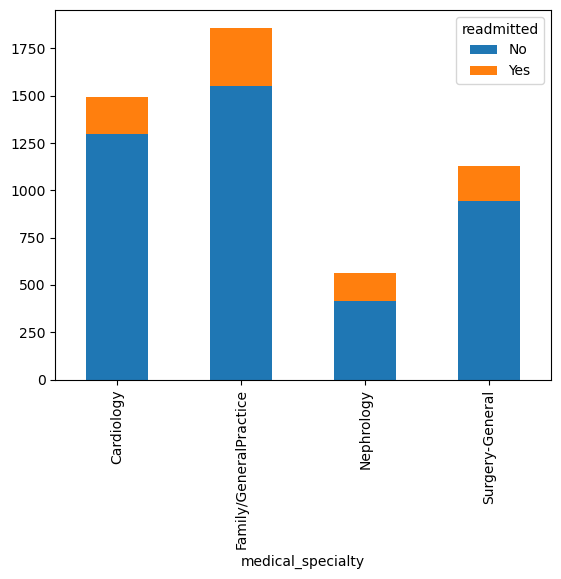

In [83]:
pd.crosstab(data['medical_specialty'],data['readmitted']).plot(kind="bar",stacked=True);

In [84]:
pd.crosstab(data.procedures, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
procedures,,
1 procd,0.823098,0.176902
2 procd,0.811698,0.188302
3 procd,0.834520,0.165480
4-5 procd,0.854478,0.145522
>5 times,0.866005,0.133995
None,0.836665,0.163335
Total,0.834259,0.165741


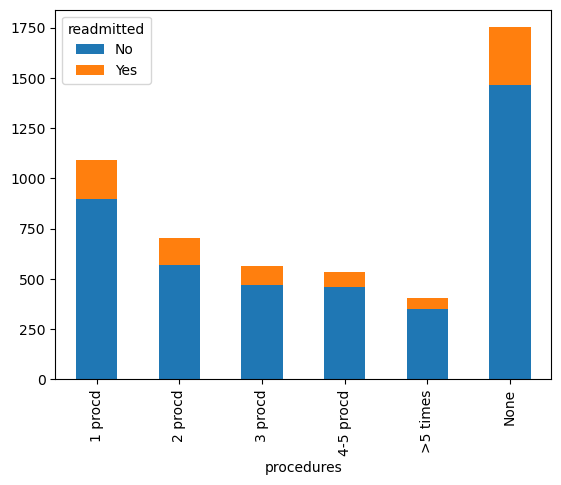

In [85]:
pd.crosstab(data['procedures'],data['readmitted']).plot(kind="bar",stacked=True);

In [86]:
pd.crosstab(data.medications, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
medications,,
1-4 med,0.915730,0.084270
11-15 med,0.841410,0.158590
16 - 20 med,0.798574,0.201426
21-25 med,0.810726,0.189274
26 - 40 med,0.800384,0.199616
5-10 med,0.876106,0.123894
>40 med,0.845361,0.154639
Total,0.834259,0.165741


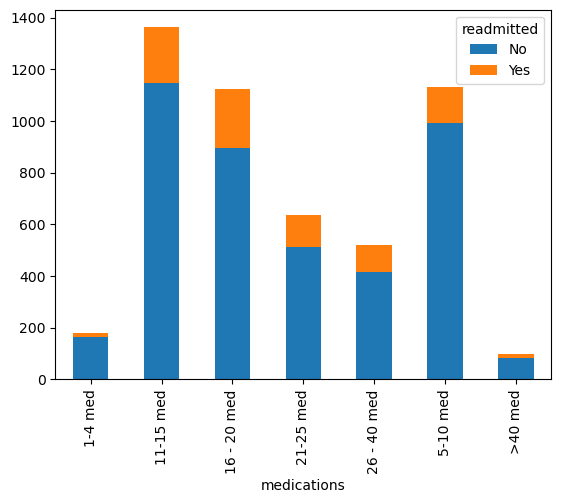

In [87]:
pd.crosstab(data['medications'],data['readmitted']).plot(kind="bar",stacked=True);

In [88]:
pd.crosstab(data.emergency_visit, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
emergency_visit,,
1 Time,0.766667,0.233333
2 Times,0.655172,0.344828
3 - 5 times,0.492754,0.507246
>5 times,0.120000,0.880000
None,0.852895,0.147105
Total,0.834259,0.165741


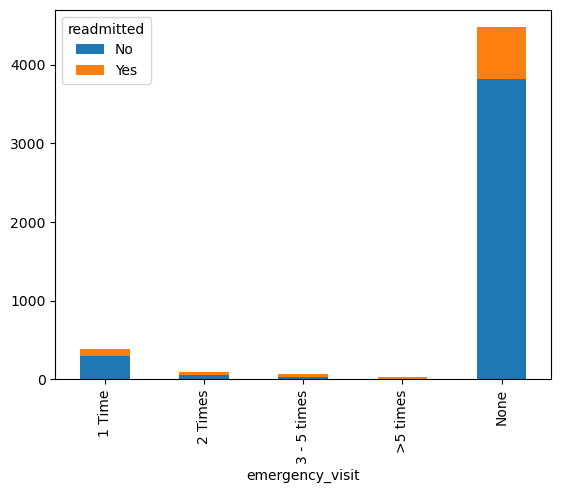

In [89]:
pd.crosstab(data['emergency_visit'],data['readmitted']).plot(kind="bar",stacked=True);

In [90]:
pd.crosstab(data.outpatient_visit, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
outpatient_visit,,
1 Time,0.764851,0.235149
2 Times,0.694215,0.305785
3 - 5 times,0.746032,0.253968
>5 times,0.764706,0.235294
None,0.847349,0.152651
Total,0.834259,0.165741


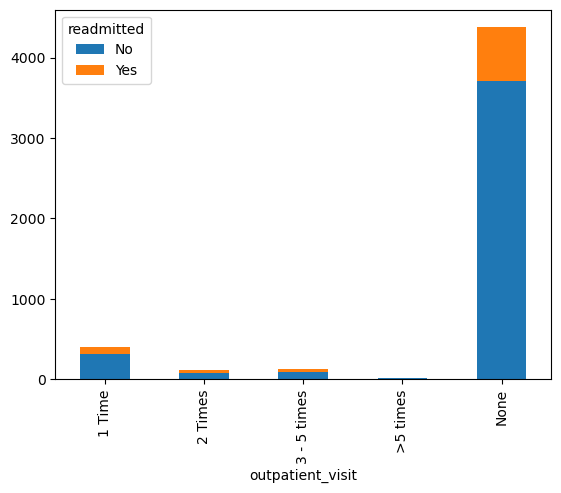

In [91]:
pd.crosstab(data['outpatient_visit'],data['readmitted']).plot(kind="bar",stacked=True);

In [92]:
pd.crosstab(data.inpatient_visit, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
inpatient_visit,,
1 Time,0.776008,0.223992
2 Times,0.675410,0.324590
3 - 6 times,0.560886,0.439114
>6 times,0.260870,0.739130
None,0.892816,0.107184
Total,0.834259,0.165741


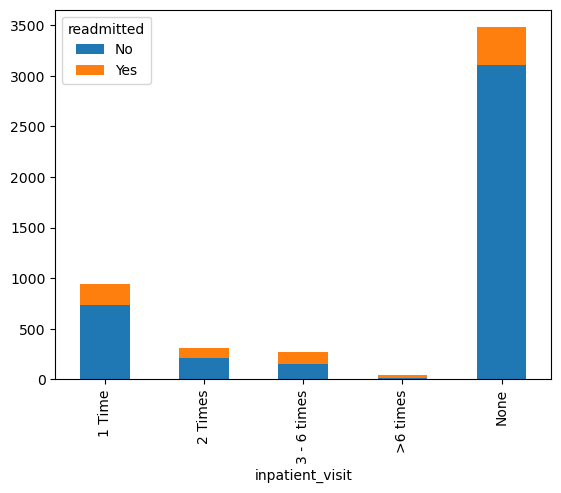

In [93]:
pd.crosstab(data['inpatient_visit'],data['readmitted']).plot(kind="bar",stacked=True);

In [94]:
pd.crosstab(data.payer_code, data.readmitted, margins=True, margins_name='Total', normalize='index')

readmitted,No,Yes
payer_code,,
BC,0.864348,0.135652
CM,0.728571,0.271429
CP,0.895954,0.104046
HM,0.913793,0.086207
MC,0.812740,0.187260
MD,0.822981,0.177019
SP,0.836190,0.163810
UN,0.888620,0.111380
Total,0.834259,0.165741


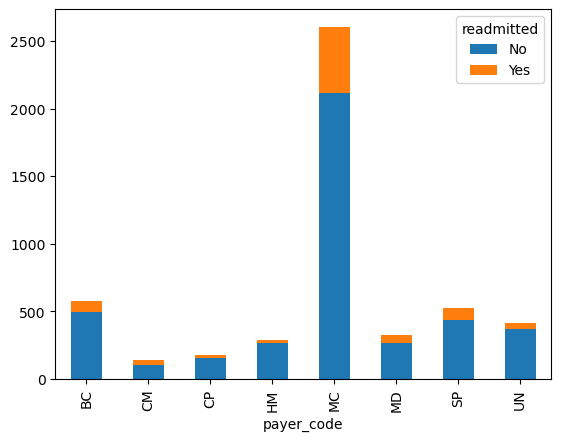

In [95]:
pd.crosstab(data['payer_code'],data['readmitted']).plot(kind="bar",stacked=True);

### Econometric modelling

In [96]:
# Create dummy variables
data2 = pd.get_dummies(data, drop_first=True)

In [97]:
data2.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),admissions_Emergency,admissions_Trauma,admissions_Urgent,adm_source_Emergency_Room,adm_source_Others,adm_source_Physcian Referral,adm_source_Transfer_Another_Hospital,adm_source_Transfer_Hospital,adm_source_Transfer_SNF,discharge_Designated_cancer_center,discharge_GH_In_patientcare,discharge_Home_care_health,discharge_Intermediate_care_facility,discharge_Reserved_For_national_Assignment,discharge_Routine_Discharge,discharge_Skilled_Nursing_Faciltiy,hospital_duration_2-5 days,hospital_duration_6-8 days,hospital_duration_9-10 days,hospital_duration_>10 days,medical_specialty_Family/GeneralPractice,medical_specialty_Nephrology,medical_specialty_Surgery-General,payer_code_CM,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_SP,payer_code_UN,procedures_2 procd,procedures_3 procd,procedures_4-5 procd,procedures_>5 times,procedures_None,medications_11-15 med,medications_16 - 20 med,medications_21-25 med,medications_26 - 40 med,medications_5-10 med,medications_>40 med,outpatient_visit_2 Times,outpatient_visit_3 - 5 times,outpatient_visit_>5 times,outpatient_visit_None,inpatient_visit_2 Times,inpatient_visit_3 - 6 times,inpatient_visit_>6 times,inpatient_visit_None,emergency_visit_2 Times,emergency_visit_3 - 5 times,emergency_visit_>5 times,emergency_visit_None,readmitted_Yes
20737,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
24069,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
24117,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
24198,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
24309,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [98]:
import statsmodels.formula.api as smf

In [101]:
data.columns

Index(['race', 'age', 'admissions', 'adm_source', 'discharge',
       'hospital_duration', 'medical_specialty', 'payer_code', 'procedures',
       'medications', 'outpatient_visit', 'inpatient_visit', 'emergency_visit',
       'readmitted'],
      dtype='object')

In [103]:
data['readmitted'].replace({'Yes':1,'No':0},inplace=True)

In [106]:
data['readmitted'].value_counts()

0    4208
1     836
Name: readmitted, dtype: int64

In [107]:
data['readmitted'] = data['readmitted'].astype(int)

In [112]:
model = smf.logit('readmitted ~ race + age + admissions + adm_source + discharge +hospital_duration + medical_specialty + payer_code + procedures + medications + outpatient_visit + inpatient_visit + emergency_visit',
data = data)

results = model.fit(cov_type="hc0")
       

Optimization terminated successfully.
         Current function value: 0.399544
         Iterations 25


In [113]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                 5044
Model:                          Logit   Df Residuals:                     4978
Method:                           MLE   Df Model:                           65
Date:                Wed, 23 Aug 2023   Pseudo R-squ.:                  0.1103
Time:                        09:11:59   Log-Likelihood:                -2015.3
converged:                       True   LL-Null:                       -2265.1
Covariance Type:                  hc0   LLR p-value:                 2.675e-68
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -0.9622      1.592     -0.604      0.546      -4.082       2.158
race[T.Asian]             